In [4]:
function random_A(a1::Real , a2::Real ,b1::Real ,b2::Real ,g::Real)
    if g==0
        r = (b1-a1)/(b1-a1+b2-a2)
        if rand()>r
            x = a2+(1-rand())*(b2-a2)
        else
            x = -b1+(1-rand())*(b1-a1)
        end
    else
        function Finv(x)
            λ1 = (b2+a2)/((b1-a1)*(a1+b1+a2+b2))
            λ2 = (b1+a1)/((b2-a2)*(a1+b1+a2+b2))
            v1 = λ1* (b1 + g/2*b1^2)
            v2 = λ2* (-a2 + g/2*a2^2)
            F1 = λ1*(-a1+b1-g/2*(a1^2-b1^2))    
            if x <=  F1
                return (1-(1+2*g*(v1-x)/λ1)^0.5)/g
            else
                return (1-(1+2*g*(v2-x+F1)/λ2)^0.5)/g
            end
        end
        x = Finv(rand())
    end
    ϕ = rand()*2*pi  
    n1 = x
    n2 = sqrt(1-x^2)*cos(ϕ)
    n3 = sqrt(1-x^2)*sin(ϕ)
    return [n1,n2,n3]
end

random_A (generic function with 1 method)

In [5]:
function random(a1::Real , a2::Real ,b1::Real ,b2::Real ,g::Real  )
    r = (b1-a1)/(b1-a1+b2-a2)
    if rand()>r
        n20 = a2+(1-rand())*(b2-a2)
    else
        n20 = -b1+(1-rand())*(b1-a1)
    end
    n10 = (1-n20^2)^0.5
    ϕ0 = rand()*2*pi
    p0 = 1-g*n10*sin(ϕ0)

    # N_mc = params["N_mc"]
    N_mc=2000
    acc_ratio = 0
    for i_mc in 1:N_mc
        r = (b1-a1)/(b1-a1+b2-a2)
        if rand()>r
            n21 = a2+(1-rand())*(b2-a2)
        else
            n21 = -b1+(1-rand())*(b1-a1)
        end
        n11 = (1-n21^2)^0.5
        p1 = 1-g*n11*sin(ϕ0)

        if rand() ≤ abs(p1/p0)
            acc_ratio += 1
            n10 = n11
            n20 = n21
            p0 = p1
        end

        ϕ1 = rand()*2*pi
        p1 = 1-g*n10*sin(ϕ1)
        if rand() ≤ abs(p1/p0)
            acc_ratio += 1
            ϕ0 = ϕ1
            p0 = p1
        end
    end
    n1 = n10*sin(ϕ0)
    n2 = n20
    n3 = n10*cos(ϕ0)
    return [n1,n2,n3]
end

random (generic function with 1 method)

In [40]:
using Pkg
Pkg.add("Plots")

In [2]:
using Plots
gr()

Plots.GRBackend()

In [18]:
# zA=mapreduce(permutedims, vcat, [random_A(0.1, .5, .2,1,-0.5) for i in 1:100000]);
zA=mapreduce(permutedims, vcat, [random_A(0.5, .4, 1,1,1) for i in 1:100000]);

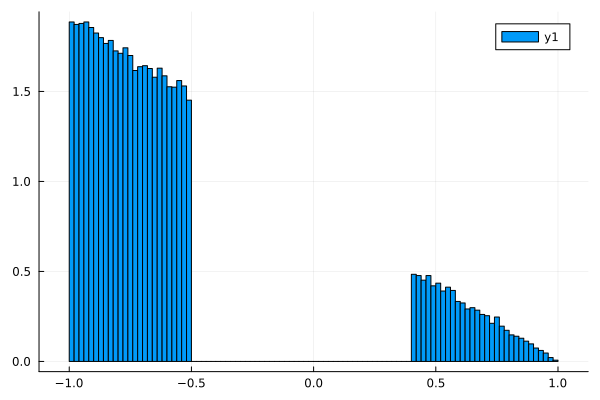

In [20]:
histogram(zA[:,1], normalize=true, bins=100)

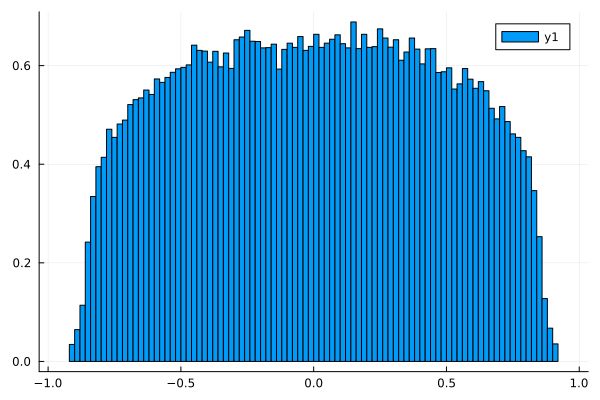

In [21]:
histogram(zA[:,2], normalize=true, bins=100)

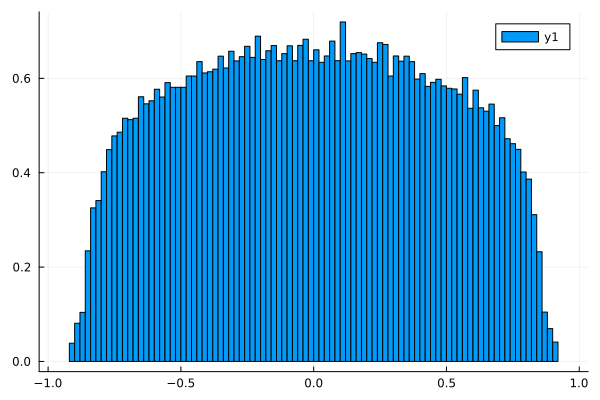

In [22]:
histogram(zA[:,3], normalize=true, bins=100)

In [25]:
# z=mapreduce(permutedims, vcat, [random(0.1, .5, .2,1,-0.5) for i in 1:100000]);
z=mapreduce(permutedims, vcat, [random(0.5, .4, 1,1,1) for i in 1:100000]);

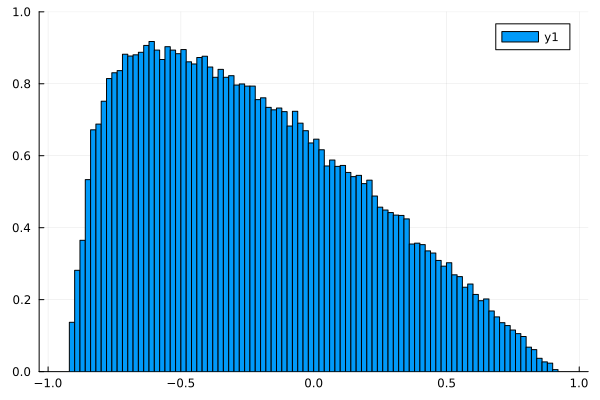

In [26]:
histogram(z[:,1], normalize=true, bins=100,ylim=(0,1))

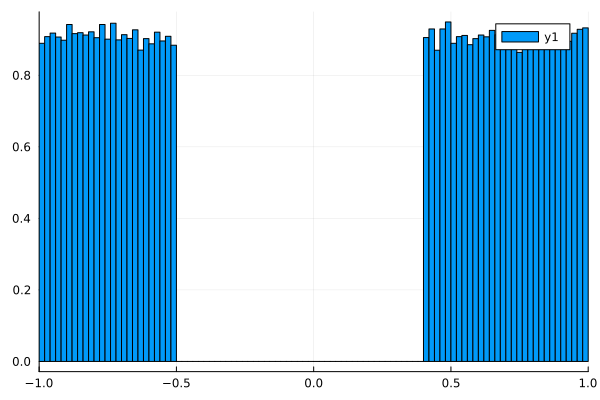

In [27]:
histogram(z[:,2], normalize=true, bins=100,xlim=(-1,1))

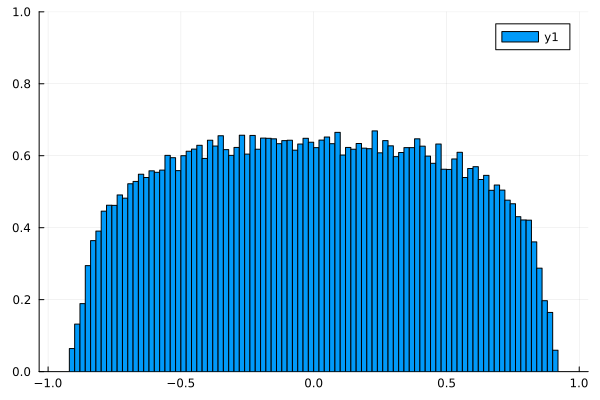

In [28]:
histogram(z[:,3], normalize=true, bins=100, ylim=(0,1))

Plots.GRBackend()

10-element Vector{Vector{Float64}}:
 [-0.4672911292501821, 0.8165013585330401, 0.3390642004662089]
 [0.12525113084754402, 0.9530982383099604, -0.2755284057077624]
 [-0.5677820631756548, 0.5083037078689128, -0.6474958450080678]
 [-0.7618065533440551, -0.624398313410298, 0.1725616454848139]
 [-0.7695105044076335, 0.5175672902066561, -0.37413591609794505]
 [-0.6002024291439342, 0.7785270892363378, 0.183446491857751]
 [-0.7788064599667788, -0.5074260572136267, -0.36875370421820514]
 [-0.2391724290654877, -0.6928597841321903, -0.6802513276041503]
 [0.6607741736476005, -0.6689982926812397, -0.3403215770854341]
 [-0.10654143317195645, 0.8708649485139219, 0.4798366018422413]